In [1]:
import numpy as np
from scipy.stats import norm, uniform, pareto, chi2, poisson
import matplotlib.pyplot as plt

# Chapter 3: Probability and Information Theory

__Probability Theory__ is the branch of mathematics concerned with how likely an event is to occur or how likely a proposition is true.  The probability of an event is expressed as a value between 0 and 1, where 0 represents the impossibility of an event and 1 represents certainty.

In the context of artificial intelligence, probability theory is used:

- To design algorithms that compute or approximate values
- To analyze the behavior of systems

## 3.1 Why Probability?

Whereas most of computer science deals with behavior that we can consider to be deterministic - i.e. the non-deterministic aspects of much of what we deal with when writing software does not come into consideration.

__Machine learning__ inherently deals with uncertaintity and even __stochastic__ values - random, unpredictable values.

### Sources of uncertainty:

1 - __Inherent stochasticity__, e.g. quantum mechanical systems; a game with a shuffled deck of cards.

2 - __Incomplete observability__, i.e. we cannot observe complete information

3 - __Incomplete modeling__, i.e. lack of precision in a compuational model of some phenomenon

### Cost / benefit tradeoffs when building systems

It's typically more cost-effective to build systems that simple rules that introduce uncertainty than to develop a complex system that results in greater certainty.

### Frequentist vs Bayesian Probability

The __Bayesian__ view of probability is the measure of the plausibility of an event given incomplete knowledge, while the __frequentist__ view of probability is related to the rate at which actual events occur.

In other words, a __frequentist__ world-view is one in which we measure probability given the outcomes over time of real events, and a __Bayesian__ world-view is one in which we measure probability as a __degree of belief__ - the plausibility of an event given existing data.

## 3.2 Random Variables

A __random variable__ is one that may take different values randomly.  These values may be __discrete__, meaning the data can take only certain values - or any value in a countably infinite number of states (e.g. "False", "Blue", "Monday") or __continuous__, meaning the data can take any arbitrary value (e.g. 19.86)

In [2]:
# Random number generation in numPy:

np.random.randint(low=1, high=100, size=4)

array([53, 89, 89, 59])

Random values produced with numPy utilize the `Generator` class.

NumPy Generators expose several different methods to generate random numbers from a variety of different probability distribution.

The standard `Generator` in numPy uses a different algorithm than the default Python generator.

- PCG-64 (numPy default)
- MT19937 (Python standard)
- Philox
- SFC64

> A BitGenerator provides a stream of random values. In order to generate reproducible streams, BitGenerators support setting their initial state via a seed. All of the provided BitGenerators will take an arbitrary-sized non-negative integer, or a list of such integers, as a seed.
(https://numpy.org/doc/stable/reference/random/bit_generators/index.html)

Random number generators can be provided an initial seed, which allows us reproducability. 

Given an initial seed, the resulting sequence is deterministic.

In [3]:
from numpy.random import Generator, MT19937, PCG64, SeedSequence
print("MT19937 (Mersenne Twister) Generator with seed 88")
mt_rng = Generator(MT19937(88))
print(mt_rng.random())

print("---")
print("PCG64 (permuted congruential generator) with seed 88")
pc_rng = Generator(PCG64(88))
print(pc_rng.random())

MT19937 (Mersenne Twister) Generator with seed 88
0.1370688215702759
---
PCG64 (permuted congruential generator) with seed 88
0.20624530978985023


Website of the PCG author, very interesting comparison of different generators, and the theory of PCG:
    
https://www.pcg-random.org/

## 3.3 Probability Distributions

A __random variable__ takes on some possible state.  A __probability distribution__ is a function that gives the probabilities of occurence of the different possible outcomes of a __random variable__.

The probability that a random variable x = $x$ is the case is denoted as:

$$ \Large P(x) $$

`scipy` provides a stats module that exposes many different continuous and discrete probability distributions.

### Continuous Probability Distributions


Discrete probability distributions can be described using __probability density functions__.

- The domain of p must be the set of all possible states of $x$.
- $\forall x \in \text{x}, p(x) \geq 0$
- $\int p(x)dx = 1$

### Normal Distribution

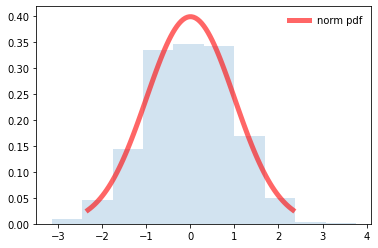

In [4]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Uniform Distribution

A uniform distribution describes a situation in which a given state is equally probable for any given random variable.

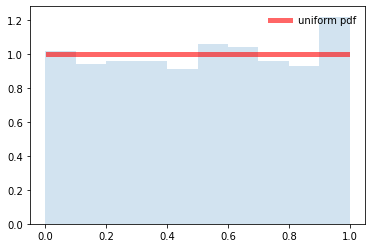

In [5]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = uniform.stats(moments='mvsk')
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Pareto Distribution

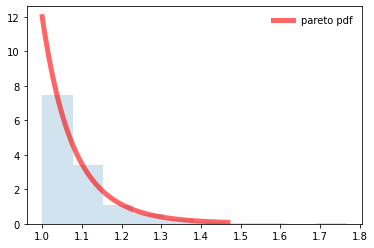

In [68]:
fig, ax = plt.subplots(1, 1)
b = 12
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0, b), pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),'r-', lw=5, alpha=0.6, label='pareto pdf')

r = pareto.rvs(b, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Discrete Probability Distributions

Discrete probability distributions can be described using __probability mass functions__.

- The domain of P must be the set of all possible states of x.
- $\forall x \in \text{x}, 0 \leq P(x) \leq 1$
- $\sum_{x \in \text{x}} P(x) = 1$

### Poisson Distribution

> a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. (https://en.wikipedia.org/wiki/Poisson_distribution)

The Poisson Distribution is used to determine the probability of a number of events in an interval generated by a __Poisson process__.  A __Poisson process__ is a model of __discrete__ events where we know the average time between events that happen at random intervals.

This can be useful for predicting how often a number events occur in a given time poeriod given the length of the period of time and the number of events that occur on average per unit of time.  For the Poisson distribution to be a valid model, we assume the following: 

- The events are independent
- The average number of events per unit time is constant 
- The events don’t occur simultaneously

The Poisson probability mass function:

$$ \Large P(k) = e^{-\lambda} \frac{\lambda^{k}}{k!} $$

$$ \large k = \text{events in interval} $$
$$ \large \lambda = \text{events / time * time period} $$

### Practical Example Problem: 

> "Given an email service, on average, is invoked by a client once every 15 minutes over a one hour period, what is the probability that the service will be invoked exactly three times over the next hour?"

Let's assume that service calls do not occur simultaneously.

Using the example above, our $\lambda$ for unit of time as minutes would be:

$$ \large \lambda = (n/t) * dt \Rightarrow \frac{1 \text{ call}}{15 \text{ minutes}} \times 60 \text{ minutes} = 4 \text{ calls expected per hour}$$ 

$$ \large \lambda = 4 $$

And the probability that exactly three service calls will be invoked during the next two hour period can be expressed as:

$$ \Large P(3 \text{ calls in hour}) = e^{-4} \frac{-64}{3!} = 0.0183 \times 10.66 \approx 0.195 \Rightarrow 19.5 \% $$

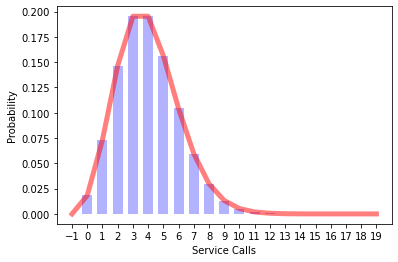

In [77]:
fig, ax = plt.subplots(1, 1)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Service Calls")
plt.ylabel("Probability")

k = 3
lambda_ = 4
mean, var, skew, kurt = poisson.stats(lambda_, moments='mvsk')

x = np.arange(poisson.ppf(0, lambda_), 20)
ax.plot(x, poisson.pmf(x, lambda_), 'r-', lw=5, ms=8, alpha=0.5, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, lambda_), colors='b', lw=10, alpha=0.3)

## 3.4 Marginal Probability

## 3.5 Conditional Probability

## 3.6 The Chain Rule of Conditional Probabilities

## 3.7 Independence and Conditional Independence

## 3.8 Expectation, Variance, and Covariance